In [18]:
#Import libraries that we are going to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests, openpyxl, csv
import time
import datetime

import smtplib 

In [21]:
#Try to get the source from the url given using BeatifulSoup.
#It will throw an eror if source is not corect or not reachable.

source = requests.get('https://www.imdb.com/chart/top')
source.raise_for_status()
    
soup = BeautifulSoup(source.text, "html.parser")

name_movie=[]
rank_list=[]
year_list=[]
rating_list=[]

movies = soup.find('tbody', class_= "lister-list").find_all('tr')
for movie in movies:
        name = movie.find('td', class_= 'titleColumn').a.text
        name_movie.append(name)
        rank = movie.find('td', class_= 'titleColumn').get_text(strip=True).split('.')[0]
        rank_list.append(rank)
        year =  movie.find('td', class_= 'titleColumn').span.text.strip('()')
        year_list.append(year)
        rating = movie.find('td', class_= 'ratingColumn imdbRating').strong.text
        rating_list.append(rating)
        print(rank, name, year, rating)

1 The Shawshank Redemption 1994 9.2
2 The Godfather 1972 9.2
3 The Dark Knight 2008 9.0
4 The Godfather: Part II 1974 9.0
5 De 12 gezworenen 1957 8.9
6 Schindler's List 1993 8.9
7 The Lord of the Rings: The Return of the King 2003 8.9
8 Pulp Fiction 1994 8.9
9 The Lord of the Rings: The Fellowship of the Ring 2001 8.8
10 The Good, the Bad and the Ugly 1966 8.8
11 Forrest Gump 1994 8.8
12 Fight Club 1999 8.8
13 Inception 2010 8.7
14 The Lord of the Rings: The Two Towers 2002 8.7
15 Star Wars: Episode V - The Empire Strikes Back 1980 8.7
16 The Matrix 1999 8.7
17 Goodfellas 1990 8.7
18 One Flew Over the Cuckoo's Nest 1975 8.6
19 Seven 1995 8.6
20 Shichinin no samurai 1954 8.6
21 It's a Wonderful Life 1946 8.6
22 The Silence of the Lambs 1991 8.6
23 Cidade de Deus 2002 8.6
24 Saving Private Ryan 1998 8.6
25 Het leven is mooi 1997 8.6
26 The Green Mile 1999 8.6
27 De sterrenoorlogen 1977 8.6
28 Interstellar 2014 8.6
29 Terminator 2: Judgment Day 1991 8.5
30 Terug naar de toekomst 1985 8.5


In [25]:
df=pd.DataFrame()
df['movie']= name_movie
df['rank']= rank_list
df['year']= year_list

df['rating'] = rating_list

In [26]:
df

,movie,rank,year,rating
0,The Shawshank Redemption,1,1994,9.2
1,The Godfather,2,1972,9.2
2,The Dark Knight,3,2008,9.0
3,The Godfather: Part II,4,1974,9.0
4,De 12 gezworenen,5,1957,8.9
...,...,...,...,...
245,Aladdin,246,1992,8.0
246,The Help,247,2011,8.0
247,Belle en het Beest,248,1991,8.0
248,Dances with Wolves,249,1990,8.0


In [27]:
df.to_csv('IMDB_Top_Movies.csv', index=False)

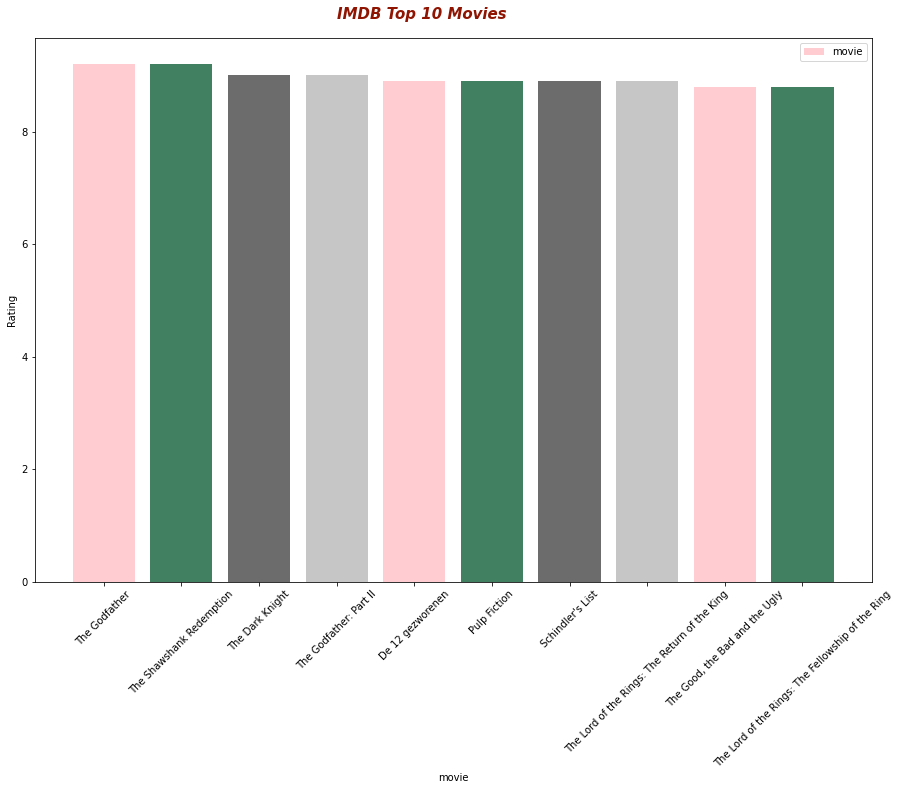

In [60]:
df_bar = df[['movie','rating']].head(10)
df_bar = df_bar.groupby('movie').mean().sort_values(by='rating', ascending=False)

plt.figure(figsize=[15,10])
plt.xlabel('movie')
plt.ylabel('Rating')

plt.text(3, 10, "IMDB Top 10 Movies",
         fontsize=15,
         color='xkcd:brick red',
         fontweight='bold',
         fontstyle='italic'
        )

plt.xticks(rotation=45)
plt.bar(x=df_bar.index, height='rating', color=['#F454','#375E','#222A','#AAAA'], data=df_bar)
plt.legend(['movie','rating'], loc=0)
plt.show()